# 3장 후반부 코드

### 작성 : [PinkWink](http://pinkwink.kr) 

## 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [6]:
from bs4 import BeautifulSoup  
import pandas as pd

In [7]:
from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20180101"

page = urlopen(url_base+url_syb)

soup = BeautifulSoup(page, "html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [8]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=151196" title="원더">원더</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=106360" title="위대한 쇼맨">위대한 쇼맨</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154573" title="다시 태어나도 우리">다시 태어나도 우리</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=158191" title="1987">1987</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=144379" title="러빙 빈센트">러빙 빈센트</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10173" title="사랑과 영혼">사랑과 영혼</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10046" title="빠삐용">빠삐용</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=169349" title="뽀로로 극장판 공룡섬 대모험">뽀로로 극장판 공룡섬 대모험</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=17327" title="히트">히트</a>
 </div>, <div c

In [9]:
soup.find_all('div', 'tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=151196" title="원더">원더</a>
</div>

In [10]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=151196" title="원더">원더</a>

In [11]:
soup.find_all('div', 'tit5')[0].a.string

'원더'

In [12]:
soup.find_all('div', 'tit5')[0].a.text

'원더'

In [13]:
soup.find_all('div', 'tit5')[0].a['href']

'/movie/bi/mi/basic.nhn?code=151196'

In [14]:
soup.find_all('div', 'tit5')[0].a['???']

KeyError: '???'

In [15]:
soup.find_all('td', 'point')

[<td class="point">9.45</td>,
 <td class="point">9.44</td>,
 <td class="point">9.33</td>,
 <td class="point">9.25</td>,
 <td class="point">9.19</td>,
 <td class="point">9.17</td>,
 <td class="point">9.17</td>,
 <td class="point">9.17</td>,
 <td class="point">9.16</td>,
 <td class="point">9.11</td>,
 <td class="point">9.10</td>,
 <td class="point">9.09</td>,
 <td class="point">9.09</td>,
 <td class="point">9.08</td>,
 <td class="point">8.99</td>,
 <td class="point">8.98</td>,
 <td class="point">8.94</td>,
 <td class="point">8.87</td>,
 <td class="point">8.82</td>,
 <td class="point">8.82</td>,
 <td class="point">8.82</td>,
 <td class="point">8.74</td>,
 <td class="point">8.68</td>,
 <td class="point">8.65</td>,
 <td class="point">8.65</td>,
 <td class="point">8.64</td>,
 <td class="point">8.60</td>,
 <td class="point">8.60</td>,
 <td class="point">8.53</td>,
 <td class="point">8.50</td>,
 <td class="point">8.48</td>,
 <td class="point">8.28</td>,
 <td class="point">8.12</td>,
 <td class

In [16]:
len(soup.find_all('td', 'point'))

40

In [17]:
soup.find_all('td', 'point')[0].string

'9.45'

In [18]:
movie_name = [tag.a.string for tag in soup.find_all('div', 'tit5')]
movie_name

['원더',
 '위대한 쇼맨',
 '다시 태어나도 우리',
 '1987',
 '러빙 빈센트',
 '사랑과 영혼',
 '빠삐용',
 '내 사랑',
 '뽀로로 극장판 공룡섬 대모험',
 '히트',
 '이터널 선샤인',
 '러브레터',
 '물랑 루즈',
 '이프 온리',
 '러브 액츄얼리',
 '극장판 포켓몬스터 너로 정했다!',
 '안녕, 나의 소울메이트',
 '벤자민 버튼의 시간은 거꾸로 간다',
 '그렇게 아버지가 된다',
 '아무도 모른다',
 '가장 따뜻한 색, 블루',
 '바닷마을 다이어리',
 '마미',
 '월터의 상상은 현실이 된다',
 '몬스터 패밀리',
 '걸어도 걸어도',
 '라라랜드',
 '태풍이 지나가고',
 '캐롤',
 '그녀',
 '강철비',
 '패터슨',
 '오리엔트 특급 살인',
 '신과함께-죄와 벌',
 '세 번째 살인',
 '너의 췌장을 먹고 싶어',
 '꾼',
 '메리와 마녀의 꽃',
 '어쌔신: 더 비기닝',
 '스타워즈: 라스트 제다이']

In [19]:
movie_point = [tag.string for tag in soup.find_all('td', 'point')]
movie_point

['9.45',
 '9.44',
 '9.33',
 '9.25',
 '9.19',
 '9.17',
 '9.17',
 '9.17',
 '9.16',
 '9.11',
 '9.10',
 '9.09',
 '9.09',
 '9.08',
 '8.99',
 '8.98',
 '8.94',
 '8.87',
 '8.82',
 '8.82',
 '8.82',
 '8.74',
 '8.68',
 '8.65',
 '8.65',
 '8.64',
 '8.60',
 '8.60',
 '8.53',
 '8.50',
 '8.48',
 '8.28',
 '8.12',
 '8.06',
 '8.05',
 '7.96',
 '7.75',
 '7.35',
 '7.21',
 '6.97']

In [20]:
date = pd.date_range('2018-1-1', periods=20, freq='M') # 월 단위
date

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31'],
              dtype='datetime64[ns]', freq='M')

In [21]:
date = pd.date_range('2018-1-1', periods=20, freq='D') # 일 단위
date

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20'],
              dtype='datetime64[ns]', freq='D')

In [22]:
import urllib
from tqdm import tqdm_notebook # 진행 Progress bar 사용

movie_dates = []
movie_names = []
movie_points = []

for today in tqdm_notebook(date):
    addr = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    url = addr.format(date=urllib.parse.quote(today.strftime('%Y%m%d')))
    response = urlopen(url)
    
    soup = BeautifulSoup(response, "html.parser")
    
    cnt = len(soup.find_all('td', 'point'))
    print(url, '-->', cnt)
    
    movie_dates.extend([today] * cnt)
    movie_names.extend([tag.a.string for tag in soup.find_all('div', 'tit5')])
    movie_points.extend([tag.string for tag in soup.find_all('td', 'point')])

http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180101 --> 40
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180102 --> 38
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180103 --> 30
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180104 --> 31
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180105 --> 33
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180106 --> 33
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180107 --> 34
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180108 --> 36
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180109 --> 36
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180110 --> 32
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180111 --> 34
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180112 --> 37
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20

In [23]:
len(movie_dates), len(movie_names), len(movie_points)

(709, 709, 709)

In [32]:
movie = pd.DataFrame({'date':movie_dates, 'name':movie_names, 
                                      'point':movie_points})
movie.sort_values(by="point", ascending=False).head(10)

,date,name,point
0,2018-01-01,원더,9.45
1,2018-01-01,위대한 쇼맨,9.44
139,2018-01-05,원더,9.44
78,2018-01-03,원더,9.44
40,2018-01-02,위대한 쇼맨,9.43
109,2018-01-04,위대한 쇼맨,9.43
108,2018-01-04,원더,9.43
79,2018-01-03,위대한 쇼맨,9.43
173,2018-01-06,원더,9.42
172,2018-01-06,위대한 쇼맨,9.42


In [33]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 3 columns):
date     709 non-null datetime64[ns]
name     709 non-null object
point    709 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 16.7+ KB


In [34]:
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 3 columns):
date     709 non-null datetime64[ns]
name     709 non-null object
point    709 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.7+ KB


In [35]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.mean)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head(20)

,point
name,
위대한 쇼맨,9.406000
원더,9.402000
다시 태어나도 우리,9.327895
로미오와 줄리엣,9.270000
1987,9.267500
킹 오브 프리즘 프라이드 더 히어로,9.196667
러빙 빈센트,9.181500
하이큐!! 재능과 센스,9.178750
코코,9.172000


In [36]:
print(type(movie_best))
#movie_best.info()
movie_best_names = movie_best.index.values
print(movie_best_names)

<class 'pandas.core.frame.DataFrame'>
['위대한 쇼맨' '원더' '다시 태어나도 우리' '로미오와 줄리엣' '1987' '킹 오브 프리즘 프라이드 더 히어로'
 '러빙 빈센트' '하이큐!! 재능과 센스' '코코' '사랑과 영혼' '빠삐용' '내 사랑' '뽀로로 극장판 공룡섬 대모험'
 '공범자들' '히트' '이터널 선샤인' '러브레터' '물랑 루즈' '이프 온리' '번지 점프를 하다' '러브 액츄얼리'
 '페르디난드' '안녕, 나의 소울메이트' '벤자민 버튼의 시간은 거꾸로 간다' '극장판 포켓몬스터 너로 정했다!' '아무도 모른다'
 '그렇게 아버지가 된다' '가장 따뜻한 색, 블루' '메이즈 러너: 데스 큐어' '그것만이 내 세상' '너의 이름은.'
 '바닷마을 다이어리' '캡틴 판타스틱' '맨체스터 바이 더 씨' '마미' '월터의 상상은 현실이 된다' '걸어도 걸어도'
 '몬스터 패밀리' '태풍이 지나가고' '라라랜드' '문영' '캐롤' '그녀' '강철비' '윈드 리버' '패터슨'
 '오리엔트 특급 살인' '메소드' '세 번째 살인' '쥬만지: 새로운 세계' '신과함께-죄와 벌' '너의 췌장을 먹고 싶어'
 '수면의 과학' '블레이드 러너 2049' '꾼' '쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?' '튤립 피버' '직쏘'
 '메리와 마녀의 꽃' '어쌔신: 더 비기닝' '스타워즈: 라스트 제다이' '다운사이징'
 '주문은 토끼입니까?? ~디어 마이 시스터~']


In [37]:
top_movie_name = movie_best_names[0]
tmp = movie.query('name == ["%s"]' % top_movie_name)
tmp

,date,name,point
1,2018-01-01,위대한 쇼맨,9.44
40,2018-01-02,위대한 쇼맨,9.43
79,2018-01-03,위대한 쇼맨,9.43
109,2018-01-04,위대한 쇼맨,9.43
140,2018-01-05,위대한 쇼맨,9.42
172,2018-01-06,위대한 쇼맨,9.42
206,2018-01-07,위대한 쇼맨,9.41
240,2018-01-08,위대한 쇼맨,9.40
275,2018-01-09,위대한 쇼맨,9.40
312,2018-01-10,위대한 쇼맨,9.40


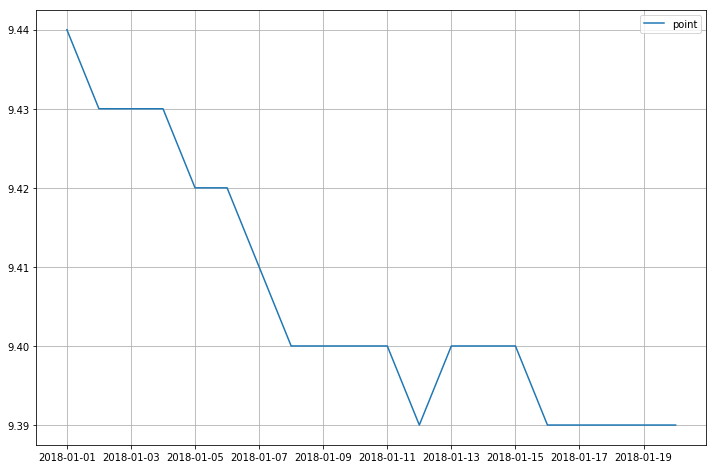

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [51]:
movie_best.head(10)

,point
name,
위대한 쇼맨,9.406000
원더,9.402000
다시 태어나도 우리,9.327895
로미오와 줄리엣,9.270000
1987,9.267500
킹 오브 프리즘 프라이드 더 히어로,9.196667
러빙 빈센트,9.181500
하이큐!! 재능과 센스,9.178750
코코,9.172000


## 영화별 날짜 변화에 따른 평점 변화 확인하기

In [52]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], 
                                         values=['point'])
movie_pivot

point                                                              \
name        1987 가장 따뜻한 색, 블루   강철비 걸어도 걸어도  공범자들 그것만이 내 세상   그녀 그렇게 아버지가 된다   
date                                                                           
2018-01-01  9.25         8.82  8.48    8.64   NaN       NaN  8.5        8.82   
2018-01-02  9.26         8.82  8.49    8.64   NaN       NaN  8.5        8.82   
2018-01-03  9.25         8.82  8.49     NaN   NaN       NaN  8.5        8.82   
2018-01-04  9.25         8.82  8.49     NaN   NaN       NaN  8.5        8.82   
2018-01-05  9.26         8.82  8.49     NaN   NaN       NaN  8.5        8.82   
2018-01-06  9.27         8.81  8.50     NaN   NaN       NaN  8.5        8.82   
2018-01-07  9.27         8.81  8.50     NaN   NaN       NaN  8.5        8.82   
2018-01-08  9.28         8.81  8.50     NaN   NaN       NaN  8.5        8.82   
2018-01-09  9.27         8.81  8.50     NaN   NaN       NaN  8.5        8.82   
2018-01-10  9.28         8.81  8.50     NaN   NaN       NaN  8.5         NaN   
2018-01-11  9.28         8.81  8.50     NaN   NaN       NaN  8.5         NaN   
2018-01-12  9.27         8.81  8.50     NaN   NaN       NaN  8.5         NaN   
2018-01-13  9.27         8.81  8.50     NaN   NaN       NaN  8.5         NaN   
2018-01-14  9.27         8.81  8.50     NaN   NaN       NaN  8.5         NaN   
2018-01-15  9.27         8.81  8.50     NaN   NaN       NaN  8.5         NaN   
2018-01-16  9.27         8.81  8.50     NaN   NaN       NaN  8.5         NaN   
2018-01-17  9.27          NaN  8.48     NaN   NaN      8.72  8.5         NaN   
2018-01-18  9.27          NaN  8.47     NaN   NaN      8.72  8.5         NaN   
2018-01-19  9.27          NaN  8.46     NaN  9.15      8.82  8.5         NaN   
2018-01-20  9.27          NaN  8.45     NaN  9.15      8.92  8.5         NaN   

                                    ...                       \
name       극장판 포켓몬스터 너로 정했다!     꾼  ...     캐롤 캡틴 판타스틱    코코   
date                                ...                        
2018-01-01              8.98  7.75  ...   8.53     NaN   NaN   
2018-01-02              8.92  7.75  ...   8.53     NaN   NaN   
2018-01-03              8.92  7.75  ...    NaN     NaN   NaN   
2018-01-04              8.92  7.74  ...    NaN     NaN   NaN   
2018-01-05              8.90  7.74  ...    NaN    8.73   NaN   
2018-01-06              8.86  7.73  ...    NaN    8.73   NaN   
2018-01-07              8.86  7.72  ...    NaN    8.73   NaN   
2018-01-08              8.84  7.72  ...    NaN    8.70   NaN   
2018-01-09              8.84   NaN  ...    NaN    8.70   NaN   
2018-01-10              8.84   NaN  ...    NaN     NaN   NaN   
2018-01-11              8.84   NaN  ...    NaN     NaN  9.30   
2018-01-12              8.84   NaN  ...    NaN     NaN  9.24   
2018-01-13              8.84   NaN  ...    NaN     NaN  9.20   
2018-01-14              8.84   NaN  ...    NaN     NaN  9.16   
2018-01-15              8.84   NaN  ...    NaN     NaN  9.15   
2018-01-16              8.84   NaN  ...    NaN     NaN  9.15   
2018-01-17              8.84   NaN  ...    NaN     NaN  9.13   
2018-01-18              8.84   NaN  ...    NaN     NaN  9.13   
2018-01-19              8.84   NaN  ...    NaN     NaN  9.13   
2018-01-20              8.85   NaN  ...    NaN     NaN  9.13   

                                                                              
name       킹 오브 프리즘 프라이드 더 히어로 태풍이 지나가고 튤립 피버   패터슨 페르디난드 하이큐!! 재능과 센스    히트  
date                                                                          
2018-01-01                 NaN      8.6   NaN  8.28   NaN          NaN  9.11  
2018-01-02                 NaN      8.6   NaN  8.32   NaN          NaN  9.11  
2018-01-03                 NaN      NaN   NaN  8.30   NaN          NaN  9.11  
2018-01-04                 NaN      NaN   NaN  8.29   NaN          NaN  9.11  
2018-01-05                 NaN      NaN   NaN  8.29   NaN          NaN  9.11  
2018-01-06                 NaN      NaN   NaN  8.29   NaN        

In [53]:
#movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot2 = movie_pivot[movie_best_names[:10]]

KeyError: "['위대한 쇼맨' '원더' '다시 태어나도 우리' '로미오와 줄리엣' '1987' '킹 오브 프리즘 프라이드 더 히어로'\n '러빙 빈센트' '하이큐!! 재능과 센스' '코코' '사랑과 영혼'] not in index"

In [54]:
movie_pivot2

NameError: name 'movie_pivot2' is not defined

In [55]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

Unknown system... sorry~~~~


In [56]:
target_col = movie_pivot2.columns[:4]
print("Movie:", target_col)
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

NameError: name 'movie_pivot2' is not defined